In [ ]:
# this notebook is to test run the custom stock trading environment

In [1]:
from getstock import get_stock_data_yf_between_with_indicators

In [1]:
import os
import re

# import libraries for training stable baselines agent
from train_stable_agent import create_stable_agents, evaluate_stable_agent, train_stable_agent, output_stable_agent, full_run

from stable_baselines3.common.env_checker import check_env

# import custom functions and classes
from curatedataset import makegymenv, run_env, full_curate_run

from get_agent import Agent, TradingAlgorithm


In [2]:
full_run("train_config_TSLA.json")

Creating output folder:  trained_stable_agents/
[*********************100%***********************]  1 of 1 completed
init env with max step:  964
Vectorizing environment


/home/victoru/anaconda3/envs/testpython/lib/python3.10/site-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in scalar divide
  dip[idx] = 100 * (self._dip[idx] / value)
/home/victoru/anaconda3/envs/testpython/lib/python3.10/site-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in scalar divide
  din[idx] = 100 * (self._din[idx] / value)
/media/victoru/B612CEC512CE8A37/stonkdecisiondocker/stonkdecision/src/curatedataset.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['momentum_stoch_rsi'].iloc[:10] = 0.5
/home/victoru/anaconda3/envs/testpython/lib/python3.10/site-packages/gymnasium/spaces/box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/home

Creating PPO agent
Using cuda device
Creating A2C agent
Using cuda device
Creating DDPG agent
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Evaluate pre training model
Evaluating model:  <stable_baselines3.ppo.ppo.PPO object at 0x7f079341f0a0>
mean_reward:-17148.70 +/- 7622.45
Evaluating model:  <stable_baselines3.a2c.a2c.A2C object at 0x7f07934e0520>
mean_reward:-5723.20 +/- 25771.26
Evaluating model:  <stable_baselines3.ddpg.ddpg.DDPG object at 0x7f07934bfd90>
mean_reward:0.00 +/- 0.00
Training model:  <stable_baselines3.ppo.ppo.PPO object at 0x7f079341f0a0>
------------------------------
| time/              |       |
|    fps             | 4921  |
|    iterations      | 1     |
|    time_elapsed    | 2     |
|    total_timesteps | 12288 |
------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 954         |
|    iterations           | 2           |

In [2]:
full_curate_run('data_config_TSLA.json', 'trained_stable_agents')

Creating environment
[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/utils.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series_output.fillna(method="ffill").fillna(value)
/usr/local/lib/python3.10/dist-packages/ta/utils.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series_output.fillna(method="ffill").fillna(value)
/usr/local/lib/python3.10/dist-packages/ta/utils.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series_output.fillna(method="ffill").fillna(value)
/usr/local/lib/python3.10/dist-packages/ta/utils.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series_output.fillna(method="ffill").fillna(val

init env with max step:  550
Getting stable agents
Running agent:  a2c
Episode:  0 Timestep: 82  done
Episode:  1 Timestep: 549  done
Episode:  2 Timestep: 306  done
Episode:  3 Timestep: 30  done
Episode:  4 Timestep: 23  done
Episode:  5 Timestep: 549  done
Episode:  6 Timestep: 229  done
Episode:  7 Timestep: 446  done
Episode:  8 Timestep: 501  done
Episode:  9 Timestep: 292  done
Episode:  10 Timestep: 244  done
Episode:  11 Timestep: 105  done
Episode:  12 Timestep: 213  done
Episode:  13 Timestep: 83  done
Episode:  14 Timestep: 333  done
Episode:  15 Timestep: 283  done
Episode:  16 Timestep: 549  done
Episode:  17 Timestep: 549  done
Episode:  18 Timestep: 135  done
Episode:  19 Timestep: 153  done
Episode:  20 Timestep: 159  done
Episode:  21 Timestep: 549  done
Episode:  22 Timestep: 277  done
Episode:  23 Timestep: 58  done
Episode:  24 Timestep: 132  done
Episode:  25 Timestep: 212  done
Episode:  26 Timestep: 376  done
Episode:  27 Timestep: 79  done
Episode:  28 Timestep

In [3]:
# make gym environment
stock_name = 'TSLA'
start_date = '2018-01-01'
num_days = 365*4
interval = '1d'
indicators = ["Volume", "volume_cmf", "trend_macd", "momentum_rsi", "momentum_stoch_rsi", "trend_sma_fast"]
init_balance = 20000
#data = get_stock_data_yf_between_with_indicators(stock_name, '2019-01-01', '2020-02-01', interval, ['all'])
#norm_env, obs_space, act_space, col, data = makegymenv(stock_name, start_date, num_days, interval, normalize=True, init_balance=init_balance)
env,obs_space, act_space, col, data = makegymenv(stock_name, start_date, num_days, interval, indicators=indicators, normalize=False, init_balance=init_balance)


[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/utils.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series_output.fillna(method="ffill").fillna(value)
/usr/local/lib/python3.10/dist-packages/ta/utils.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series_output.fillna(method="ffill").fillna(value)
/usr/local/lib/python3.10/dist-packages/ta/utils.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series_output.fillna(method="ffill").fillna(value)
/usr/local/lib/python3.10/dist-packages/ta/utils.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series_output.fillna(method="ffill").fillna(val

init env with max step:  1006


/usr/local/lib/python3.10/dist-packages/ta/utils.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series_output.fillna(method="ffill").fillna(method='bfill')
/usr/local/lib/python3.10/dist-packages/ta/utils.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series_output.fillna(method="ffill").fillna(method='bfill')
/usr/local/lib/python3.10/dist-packages/ta/utils.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series_output.fillna(method="ffill").fillna(value)
/usr/local/lib/python3.10/dist-packages/ta/utils.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series_output.fillna(method="

In [2]:
# read json file from directory
import json
import os

# get files under directory
def get_files(path):
    files = []
    for r, d, f in os.walk(path):
        for file in f:
            if '.json' in file:
                files.append(os.path.join(r, file))
    return files

# read the first json file
files = get_files('stock_trade_data')

In [36]:
n = 5
# load json from directory
with open(files[n]) as f:
    data = json.load(f)
print(files[n])

stock_trade_data/a2c_TSLA_2019-12-01.json


In [39]:
import numpy as np
ep = 0
# get the first state episode
state = np.array(data['data'][ep]['state'])
col = data['env_state']
action = np.array(data['data'][ep]['action'])
date = data['date'][:state.shape[0]]
print(state.shape)
print(len(date))

(83, 15)
83


check:  <class 'numpy.ndarray'>


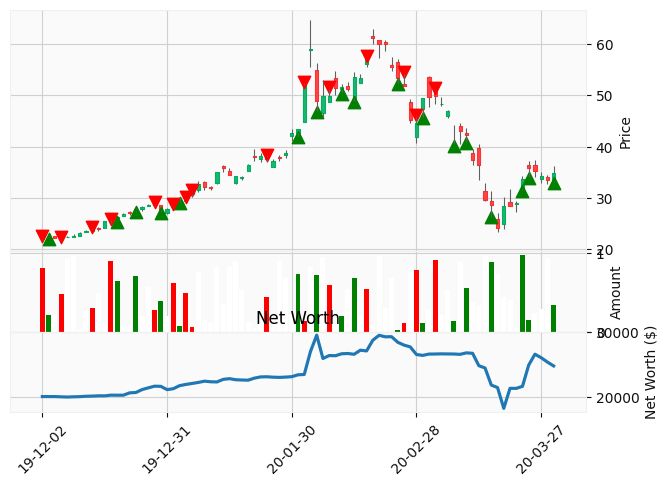

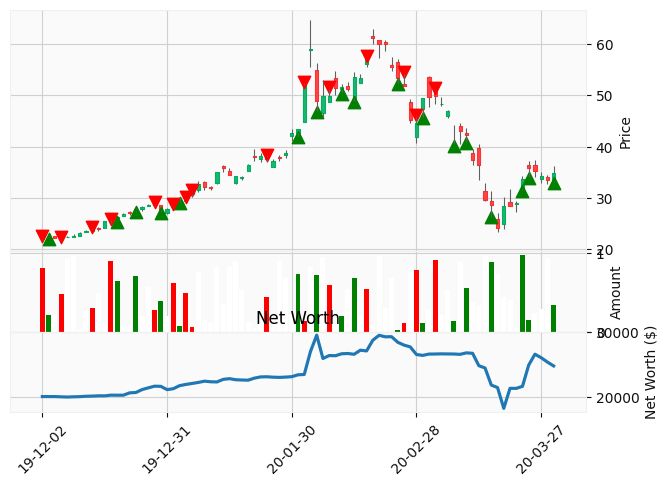

In [40]:
from StockTradingGraph import plot_stock_trading_data
plot_stock_trading_data(state, col, action, date)

In [4]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'volume_adi',
       'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em',
       'volume_vpt', 'volume_vwap', 'volume_mfi', 'volume_nvi',
       'volatility_bbm', 'volatility_bbh', 'volatility_bbl', 'volatility_bbw',
       'volatility_bbp', 'volatility_bbhi', 'volatility_bbli',
       'volatility_kcc', 'volatility_kch', 'volatility_kcl', 'volatility_kcw',
       'volatility_kcp', 'volatility_kchi', 'volatility_kcli',
       'volatility_dcl', 'volatility_dch', 'volatility_dcm', 'volatility_dcw',
       'volatility_dcp', 'volatility_atr', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       

In [5]:
col

['Open',
 'High',
 'Low',
 'Close',
 'volume_cmf',
 'trend_macd',
 'momentum_rsi',
 'momentum_stoch_rsi',
 'Balance',
 'Net_worth',
 'Shares_held',
 'Cost_basis',
 'Total_shares_sold',
 'Total_sales_value']